# Bias-Variance Tradeoff
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/hanchen92/THU-STAT-ML-113-1-1597/blob/main/Ch02-bias-variance-tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/hanchen92/THU-STAT-ML-113-1-1597/blob/main/Ch02-bias-variance-tradeoff.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [1]:
import numpy as np

In [2]:
# random seed
tmp_seed = 20240918
# number observation of training set
tmp_n = 100

# truth model
# option 1: linear function
def fun_linear(x):
    return(1 + 2*x)
    
# option 2: quadratic function
def fun_quadratic(x):
    return(1 + 2*x +0.2*x**2)


test_fun = fun_quadratic
#test_fun = fun_linear


# Size of the power of polynomial to fit the regression model
model_fit_pow = 1


# One Sample

## Sampling

In [3]:
rng = np.random.default_rng(tmp_seed)
x = rng.normal(0,2,tmp_n)

y = test_fun(x)+rng.normal(0,2,tmp_n)

In [4]:
tmp_x_lin = np.linspace(-7,7,100)
tmp_y_lin = test_fun(tmp_x_lin)

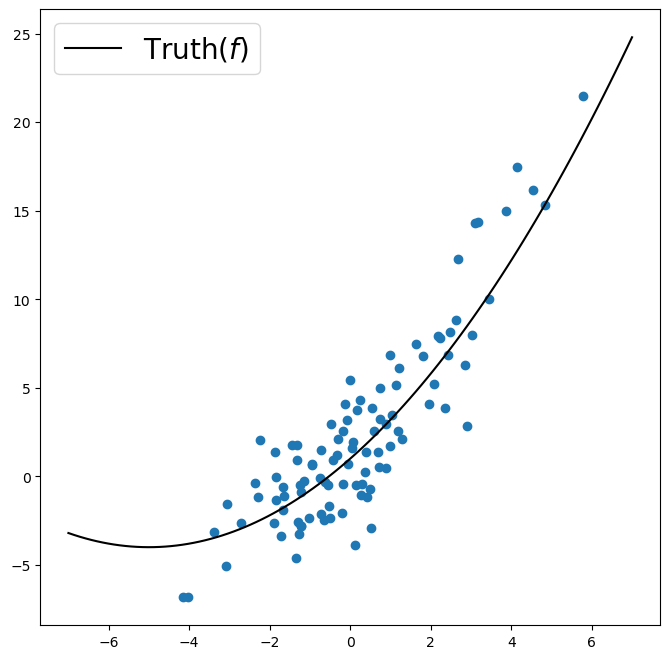

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots


fig, ax = subplots(figsize=(8, 8))
ax.plot(tmp_x_lin,tmp_y_lin,color='black',label=r'Truth($f$)')
ax.scatter(x,y)
ax.legend(fontsize="20");

## Fitting Regression

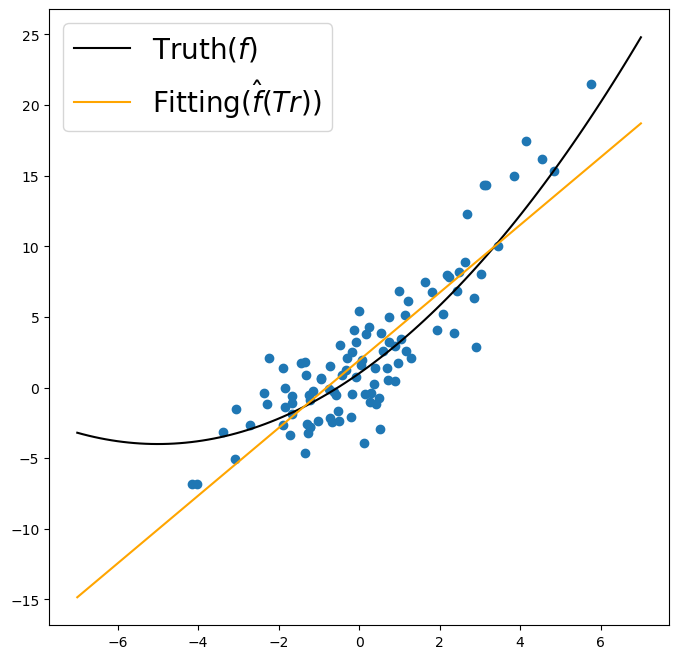

In [6]:
def poly(x, degree):
    return np.vander(x, degree + 1, increasing=True)[:, 1:]

import statsmodels.formula.api as smf
import pandas as pd 

df = pd.DataFrame({"x": x, "y": y})

formula="y ~ poly(x, "+ str(model_fit_pow) +")"

model = smf.ols(formula = formula, data=df)
results = model.fit()


tmp_df_lin = pd.DataFrame({"x": tmp_x_lin})
tmp_y_lin_by_fit = results.predict(tmp_df_lin)

fig, ax = subplots(figsize=(8, 8))
ax.plot(tmp_x_lin,tmp_y_lin,color='black',label = r'Truth($f$)')
ax.plot(tmp_x_lin,tmp_y_lin_by_fit,color='orange',label = r"Fitting($\hat{f}(Tr)$)")
ax.scatter(x,y)
ax.legend(fontsize="20");

# Multiple Samples

In [7]:
rng = np.random.default_rng(tmp_seed)
all_y_lin_by_fit = []
# repeat "tmp_repeat_time" times generate sample and fit regression   
tmp_repeat_time = 100
for i in range(tmp_repeat_time):
    x = rng.normal(0,2,tmp_n)
    y = test_fun(x)+rng.normal(0,2,tmp_n)
    df = pd.DataFrame({"x": x, "y": y})
    model = smf.ols(formula = formula, data=df)
    results = model.fit()
    
    tmp_df_lin = pd.DataFrame({"x": tmp_x_lin})
    tmp_y_lin_by_fit = results.predict(tmp_df_lin)

    
    all_y_lin_by_fit.append(tmp_y_lin_by_fit)

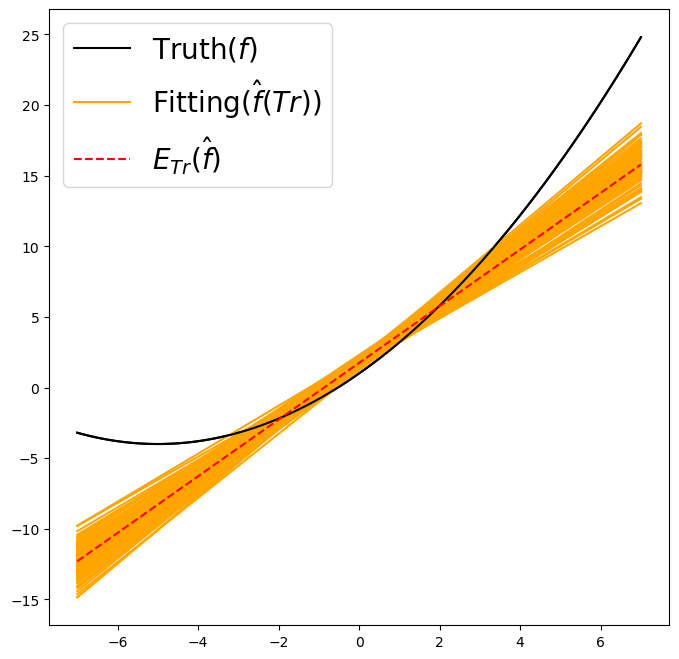

In [8]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(tmp_x_lin,tmp_y_lin,color='black',label=r'Truth($f$)')

for i in range(tmp_repeat_time):
    if i ==0:
        ax.plot(tmp_x_lin,all_y_lin_by_fit[i],color='orange',label=r"Fitting($\hat{f}(Tr)$)")
    else:
        ax.plot(tmp_x_lin,all_y_lin_by_fit[i],color='orange')

ax.plot(tmp_x_lin,tmp_y_lin,color='black')

tmp_y_lin_by_fit_mean = np.array(all_y_lin_by_fit).mean(axis=0)
ax.plot(tmp_x_lin,tmp_y_lin_by_fit_mean,color='red', linestyle='dashed',label= r"$E_{Tr}(\hat{f})$")
ax.legend(fontsize="20");